<a href="https://colab.research.google.com/github/victor-octavio/processamento-de-imagens/blob/Aula_4/Filtragem_Espacial_Completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Implementação da figura 3.3 de Gonzlez, pg98.
img = np.zeros((5,5)) # Matriz 5x5 sendo criada com zeros.
mask = np.array([(1, 2, 3), (4, 5, 6), (7, 8 ,9)]) # Kernel aplicado em cima da matriz 5x5.
img[(2,2)] = 1

In [3]:
print(img)
print(mask)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


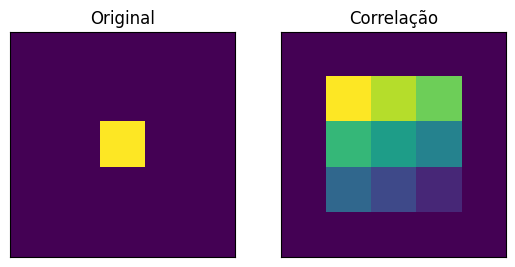

In [4]:
kernel = mask

img=np.array(img)
dst = cv2.filter2D(img,-1,kernel) # -1 é o "ddepth", DataType de cada elemento da imagem, ou seja, a exatidão para representar
#cadacada pixel. Quanto mais bits por pixel, melhor o contraste na imagem.
#dst = imagem resultante
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Correlação')
plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
print(img)
print(dst)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 9. 8. 7. 0.]
 [0. 6. 5. 4. 0.]
 [0. 3. 2. 1. 0.]
 [0. 0. 0. 0. 0.]]


In [6]:
img.dtype

dtype('float64')

In [7]:
dst.dtype

dtype('float64')

**Filtro de suavização: média simples**

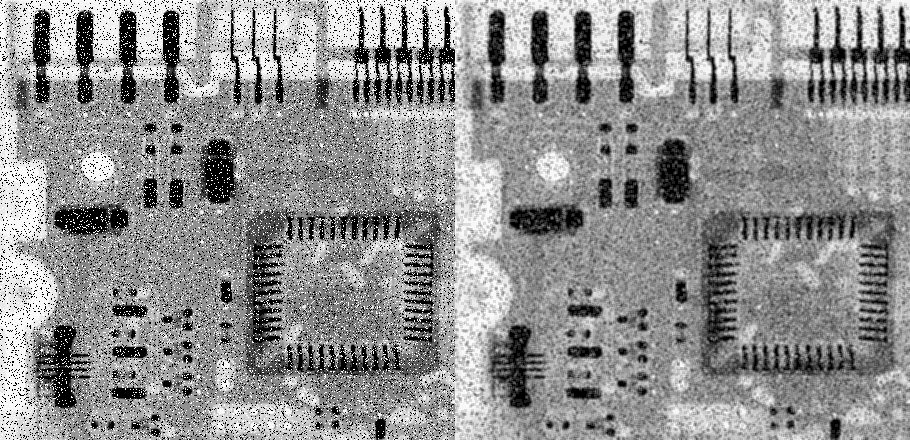

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('Fig0335(a).tif')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B

#kernel = np.array([[0.0, -1.0, 0.0],
                  #[-1.0, 4.0, -1.0],
                 # [0.0, -1.0, 0.0]])

#kernel = (1/9)*np.array([[1.0, 1.0, 1.0],
                 # [1.0, 1.0, 1.0],
                 # [1.0, 1.0, 1.0]])

#Criando filtros de média simples com difrentes vizinhanças:
size_kernel = 3
kernel = (1/(size_kernel*size_kernel))*np.ones((size_kernel,size_kernel))

#filter the source image
img_f = cv2.filter2D(img_,-1,kernel)

h_img = cv2.hconcat([img_, img_f])
cv2_imshow(h_img)


In [ ]:
kernel

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

**Filtro de suavização: Mediana**

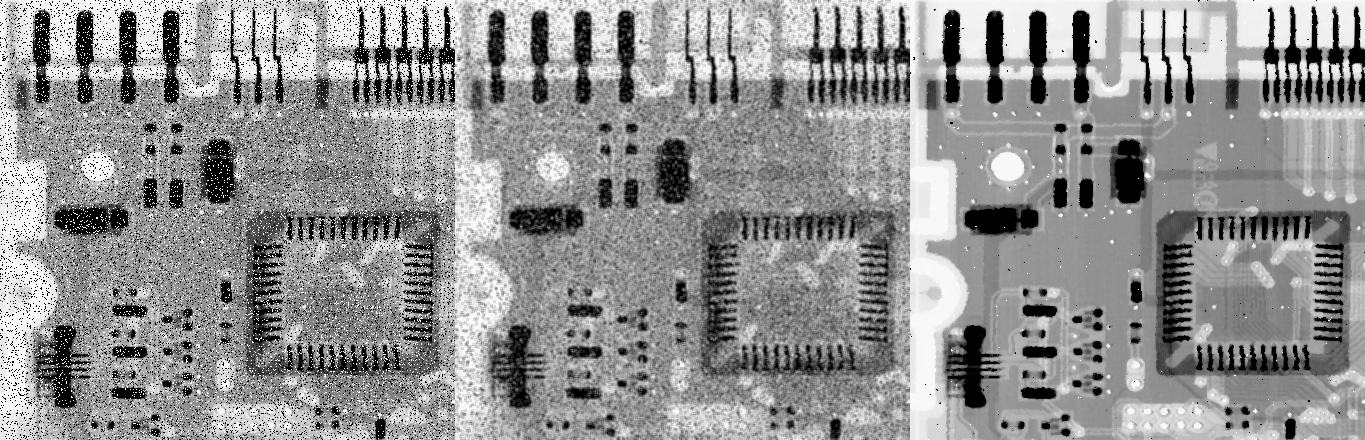

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('Fig0335(a).tif')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B

#Imagem 3.35 capítulo 3 livro do González
median = cv2.medianBlur(img_, 3)
h_img = cv2.hconcat([img_, img_f, median])
cv2_imshow(h_img)

**Filtros passa-altas:**

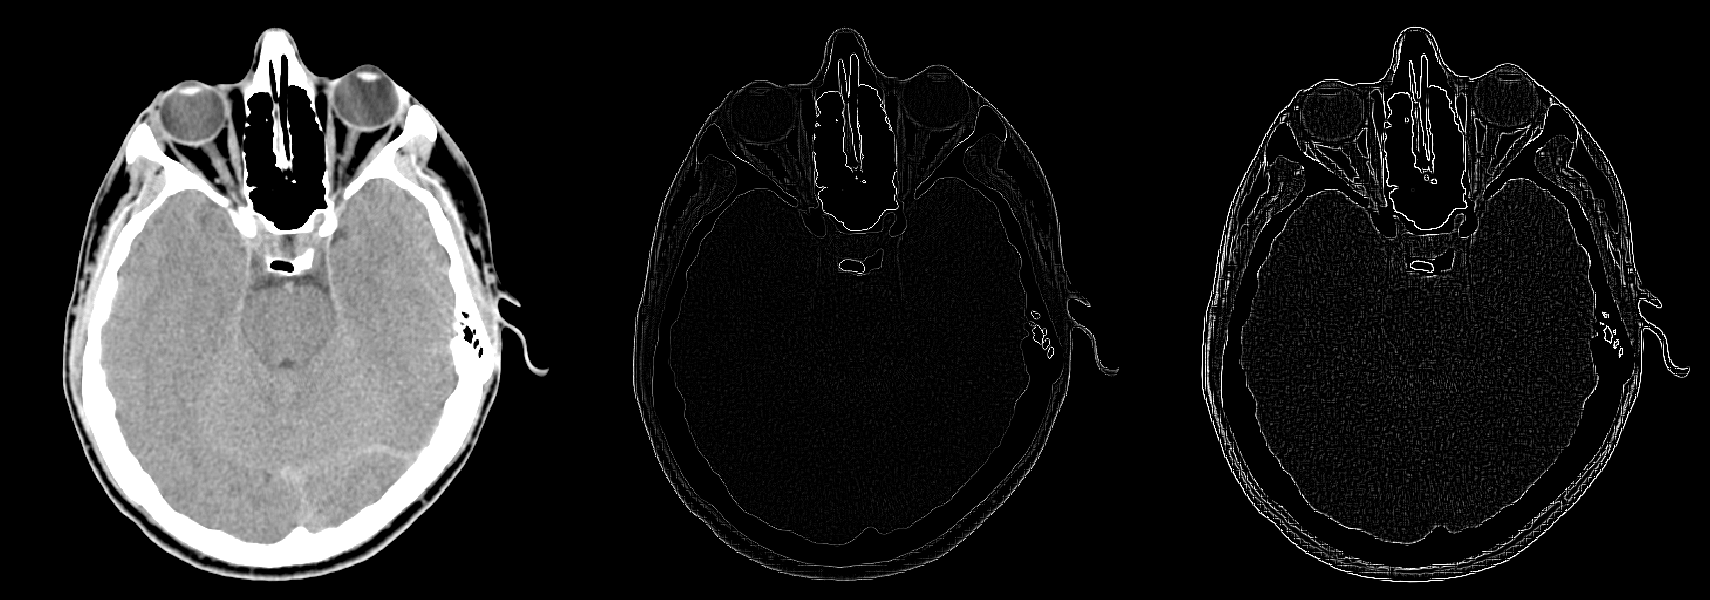

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('Fig0359(a).tif')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B

kernel1 = np.array([[0.0, -1.0, 0.0],
                  [-1.0, 4.0, -1.0],
                  [0.0, -1.0, 0.0]])

kernel2 = np.array([[1.0, 1.0, 1.0],
                  [1.0, -8.0, 1.0],
                  [1.0, 1.0, 1.0]])

#filter the source image
img_pa1 = cv2.filter2D(img_,-1,kernel1)
img_pa2 = cv2.filter2D(img_,-1,kernel2)

h_img = cv2.hconcat([img_, img_pa1, img_pa2])
cv2_imshow(h_img)



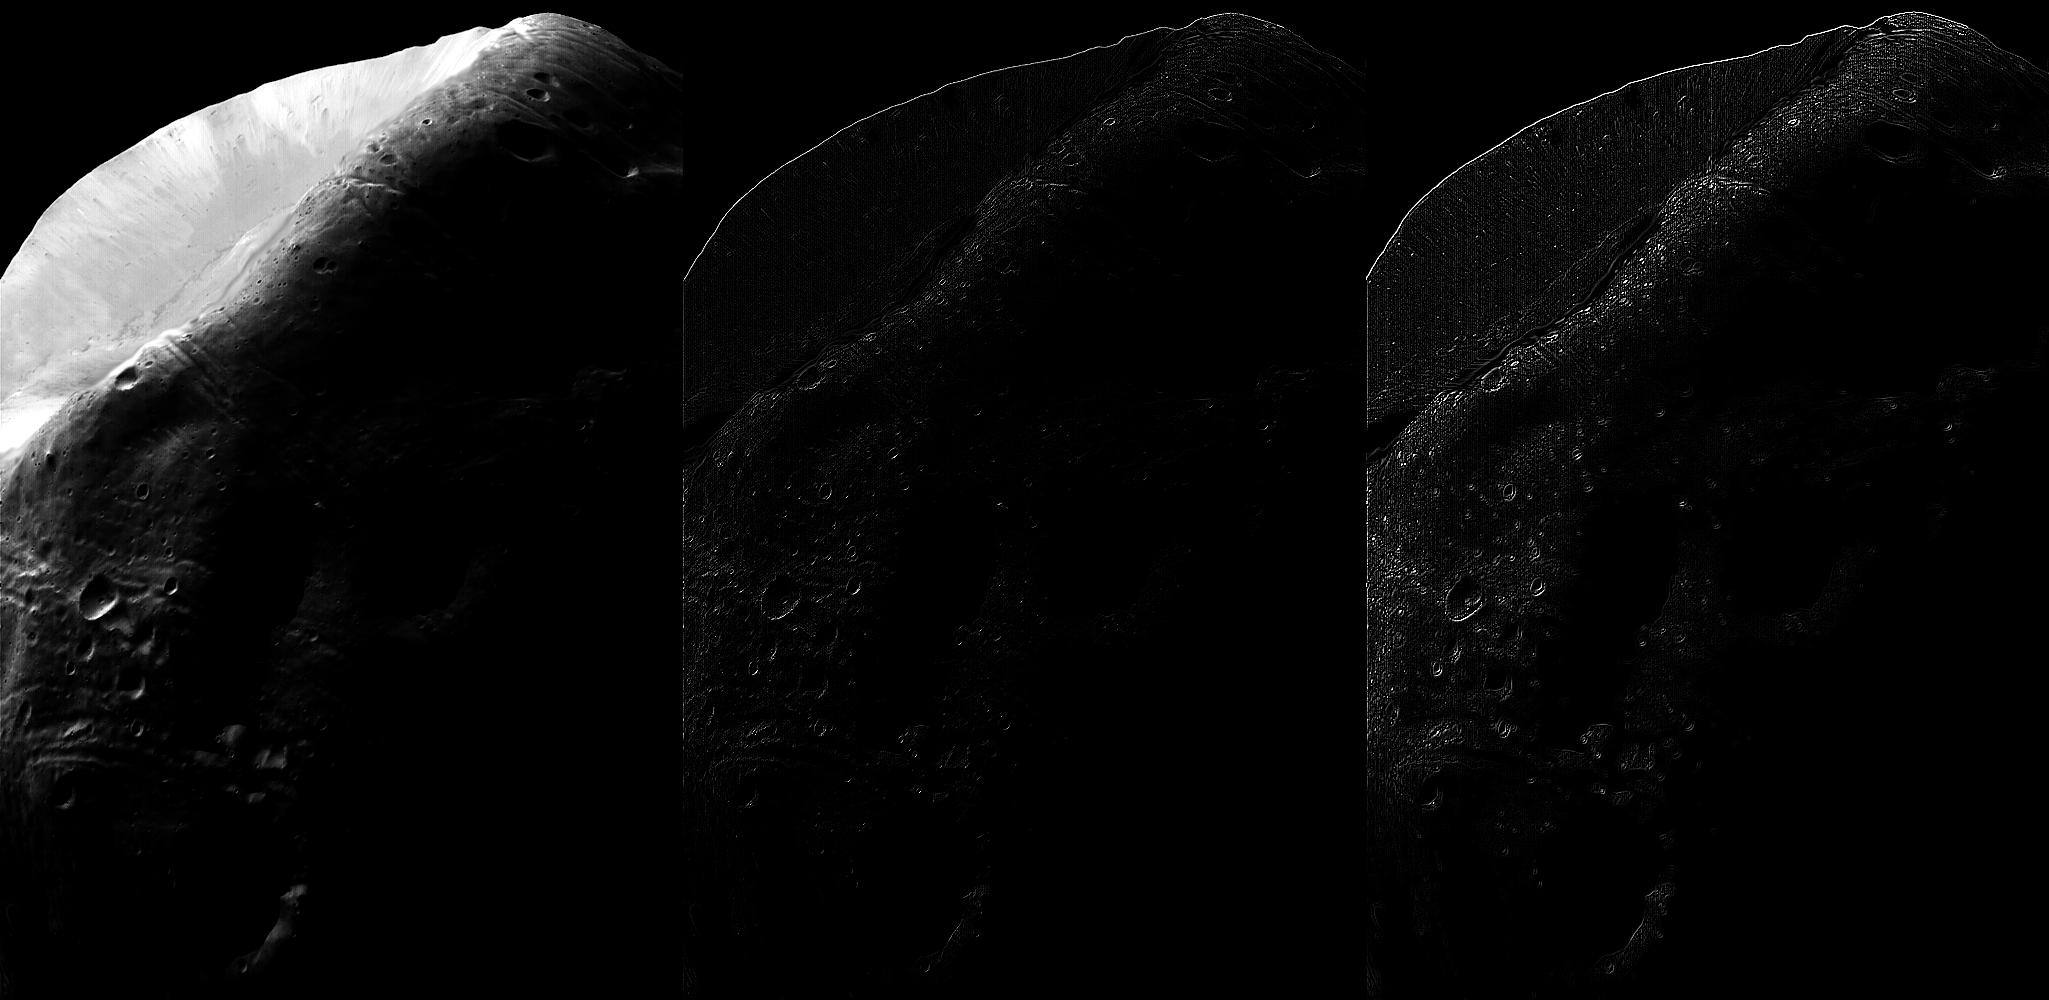

In [ ]:
img = cv2.imread('Fig0323(a).tif')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B

kernel1 = np.array([[0.0, -1.0, 0.0],
                  [-1.0, 4.0, -1.0],
                  [0.0, -1.0, 0.0]])

kernel2 = np.array([[1.0, 1.0, 1.0],
                  [1.0, -8.0, 1.0],
                  [1.0, 1.0, 1.0]])

#filter the source image
img_pa1 = cv2.filter2D(img_,-1,kernel1)
img_pa2 = cv2.filter2D(img_,-1,kernel2)

h_img = cv2.hconcat([img_, img_pa1, img_pa2])
cv2_imshow(h_img)


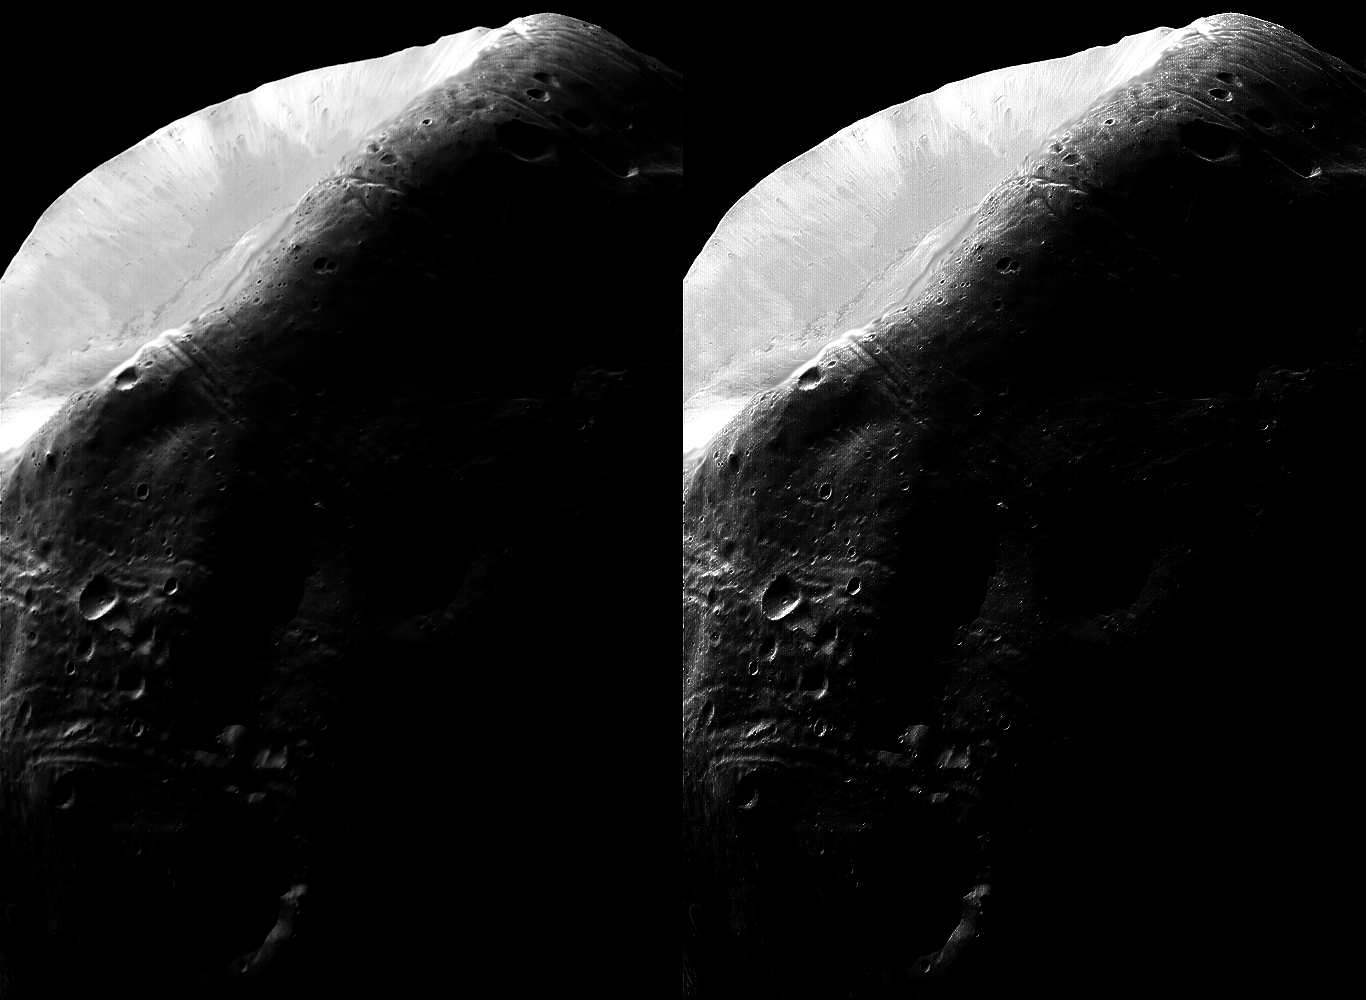

In [ ]:
#AGUÇAMENTO:

agucamento=cv2.add(img_,img_pa1) #https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html

h_img = cv2.hconcat([img_, agucamento])
cv2_imshow(h_img)
